Questions:

Do offenders typically know their victims? (Eda)
Which age group has more gun violence? Map across states. (Eda)
What is the trend of gun violence across time? (Eda)
Does gun violence coincide with specific events/holidays (Christmas/New Years/etc)
Do certain seasons have a higher prevalence of gun violence?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read in and view data
data = pd.read_csv('US_gun_deaths_1985-2018.csv')
data.head(1000)

,Unnamed: 0,year,month,region,state,victim_age,victim_sex,victim_race,victim_race_plus_hispanic,victim_ethnicity,...,victim_offender_split,offenders_relationship_to_victim,offenders_relationship_to_victim_grouping,offender_sex,circumstance,circumstance_grouping,extra_circumstance_info,multiple_victim_count,incident_id,additional_victim
0,0,1985,2,Southeast,AL,27,Male,White (includes Mexican-Americans),White,Not of Hispanic Origin,...,Single Victim/Single Offender,stranger,Offender Not Known to Victim,Male,Felon Killed by Police,Justifiable Homicide,Felon Killed in Commission of a Crime,0,0,False
1,1,1985,3,Southeast,AL,61,Male,White (includes Mexican-Americans),White,Not of Hispanic Origin,...,Single Victim/Single Offender,acquaintance,Outside Family But Known to Victim,Male,Brawl Due to Influence of Alcohol,Other Than Felony Type,NaN,0,1,False
2,2,1985,4,Southeast,AL,29,Female,White (includes Mexican-Americans),White,Not of Hispanic Origin,...,Single Victim/Single Offender,wife,Within Family,Male,Other (Other Than Felony Type),Other Than Felony Type,NaN,0,2,False
3,3,1985,5,Southeast,AL,45,Male,White (includes Mexican-Americans),White,Not of Hispanic Origin,...,Single Victim/Single Offender,acquaintance,Outside Family But Known to Victim,Male,Other (Other Than Felony Type),Other Than Felony Type,NaN,0,3,False
4,4,1985,7,Southeast,AL,30,Male,White (includes Mexican-Americans),White,Not of Hispanic Origin,...,Multiple Victims/Single Offender,acquaintance,Outside Family But Known to Victim,Male,Narcotic Drug Laws,Felony Type,NaN,1,7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1985,3,Southwest,CA,24,Male,White (includes Mexican-Americans),Hispanic Origin,Hispanic Origin,...,Single Victim/Multiple Offenders,stranger,Offender Not Known to Victim,Female,Robbery,Felony Type,NaN,0,1546,False
996,996,1985,10,Southwest,CA,18,Male,Black,Black,Not of Hispanic Origin,...,Single Victim/Single Offender,other - known to victim,Outside Family But Known to Victim,Male,Felon Killed by Police,Justifiable Homicide,Felon Killed in Commission of a Crime,0,1548,False
997,997,1985,1,Southwest,CA,22,Male,White (includes Mexican-Americans),White,Not of Hispanic Origin,...,Single Victim/Single Offender,other - known to victim,Outside Family But Known to Victim,Male,Felon Killed by Police,Justifiable Homicide,Felon Killed in Commission of a Crime,0,1549,False
998,998,1985,2,Southwest,CA,21,Female,White (includes Mexican-Americans),Hispanic Origin,Hispanic Origin,...,Single Victim/Single Offender,acquaintance,Outside Family But Known to Victim,Male,Other Arguments,Other Than Felony Type,NaN,0,1551,False


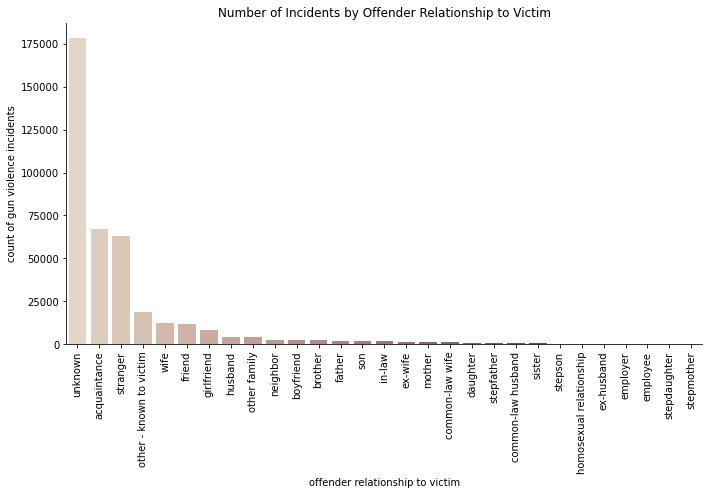

In [3]:
#Do offenders typically know their victims?


sns.catplot(x="offenders_relationship_to_victim", kind="count", palette="ch:.25", data = data, order = data['offenders_relationship_to_victim'].value_counts().index, height=5, aspect=2)
plt.xticks(rotation=90)
plt.xlabel('offender relationship to victim')
plt.ylabel('count of gun violence incidents')
plt.title('Number of Incidents by Offender Relationship to Victim')
plt.show()

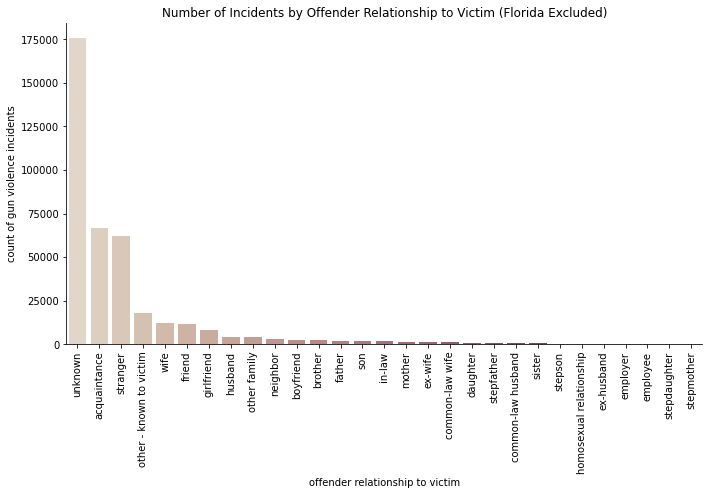

In [4]:
#Florida excluded
#Do offenders typically know their victims?

state_list = ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'GA', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NB', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY', 'AK', 'HI', 'VI']
filtr1 = data[data.state.isin(state_list)]
sns.catplot(x="offenders_relationship_to_victim", kind="count", palette="ch:.25", data = filtr1, order = filtr1['offenders_relationship_to_victim'].value_counts().index, height=5, aspect=2)
plt.xticks(rotation=90)
plt.xlabel('offender relationship to victim')
plt.ylabel('count of gun violence incidents')
plt.title('Number of Incidents by Offender Relationship to Victim (Florida Excluded)')
plt.show()

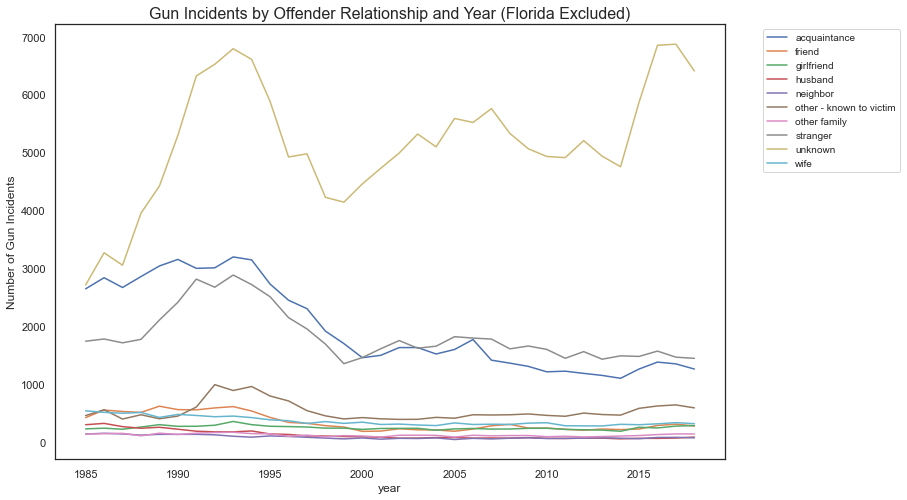

In [5]:
#Florida excluded
#Do offenders typically know their victims?

top10_rel_list = ['unknown', 'acquaintance', 'stranger', 'other - known to victim',
       'wife', 'friend', 'girlfriend', 'husband', 'other family', 'neighbor']

state_list = ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'GA', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NB', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY', 'AK', 'HI', 'VI']
filtr2 = data[data.state.isin(state_list) & data.offenders_relationship_to_victim.isin(top10_rel_list)]
filtr2.offenders_relationship_to_victim.unique()
sns.set()
sns.set_style("white")

filtr2.pivot_table(index='year', columns='offenders_relationship_to_victim', values="incident_id", aggfunc='count').plot(figsize=(12, 8))
plt.ylabel('Number of Gun Incidents')
plt.title("Gun Incidents by Offender Relationship and Year (Florida Excluded)", fontsize =16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

In [6]:
r = data[['offenders_relationship_to_victim', 'incident_id']].groupby('offenders_relationship_to_victim').count().sort_values(by='incident_id', ascending=False).head(10)
r.index

Index(['unknown', 'acquaintance', 'stranger', 'other - known to victim',
       'wife', 'friend', 'girlfriend', 'husband', 'other family', 'neighbor'],
      dtype='object', name='offenders_relationship_to_victim')

In [26]:
data.pivot_table(index='year', columns='offenders_relationship_to_victim', values="incident_id", aggfunc='count')


offenders_relationship_to_victim,acquaintance,boyfriend,brother,common-law husband,common-law wife,daughter,employee,employer,ex-husband,ex-wife,...,other family,sister,son,stepdaughter,stepfather,stepmother,stepson,stranger,unknown,wife
year,,,,,,,,,,,,,,,,,,,,,
1985,2803.0,133.0,135.0,47.0,54.0,33.0,14.0,9.0,29.0,61.0,...,146.0,23.0,89.0,3.0,36.0,5.0,25.0,1866.0,3003.0,572.0
1986,2981.0,151.0,122.0,37.0,67.0,23.0,4.0,8.0,37.0,55.0,...,151.0,23.0,99.0,4.0,42.0,4.0,17.0,1826.0,3687.0,560.0
1987,2791.0,127.0,135.0,41.0,59.0,34.0,6.0,13.0,23.0,44.0,...,150.0,30.0,76.0,5.0,23.0,4.0,22.0,1804.0,3448.0,540.0
1988,2855.0,117.0,117.0,28.0,58.0,35.0,9.0,9.0,11.0,52.0,...,103.0,20.0,80.0,5.0,23.0,3.0,14.0,1770.0,3950.0,507.0
1989,3038.0,123.0,113.0,39.0,44.0,45.0,10.0,7.0,19.0,37.0,...,149.0,23.0,71.0,5.0,21.0,NaN,18.0,2104.0,4419.0,421.0
1990,3151.0,131.0,135.0,37.0,39.0,35.0,13.0,12.0,15.0,51.0,...,127.0,20.0,75.0,6.0,28.0,6.0,14.0,2411.0,5294.0,473.0
1991,2997.0,113.0,129.0,24.0,45.0,36.0,5.0,8.0,16.0,42.0,...,148.0,14.0,70.0,4.0,20.0,4.0,14.0,2811.0,6321.0,455.0
1992,3006.0,104.0,115.0,42.0,70.0,34.0,4.0,10.0,16.0,43.0,...,160.0,16.0,74.0,8.0,25.0,NaN,14.0,2760.0,6870.0,467.0
1993,3194.0,136.0,127.0,31.0,62.0,33.0,14.0,10.0,11.0,51.0,...,165.0,19.0,66.0,8.0,25.0,2.0,21.0,2968.0,7180.0,483.0


In [ ]:
#Which age group has more gun violence? Map across states.
#ref: https://www.geeksforgeeks.org/replacing-strings-with-numbers-in-python-for-data-analysis/
data['victim_age'].fillna(0, inplace=True)
data.victim_age[data.victim_age == 'Less than one year old'] = 0.5
data.victim_age[data.victim_age == '99 years or older'] = 99
data.victim_age = data.victim_age.astype('float')
data['victim_age'].plot(kind='hist',bins=5)

#can ignore warning; ref: https://towardsdatascience.com/explaining-the-settingwithcopywarning-in-pandas-ebc19d799d25


Mean victim age ranges from 29 through 32 between 1985 and 2018. That said, the mean victim age did increase slightly over time, increasing from 29.4 in 1991 to 32.6 in 2018.

In [9]:
#change to median vs. mean 
# data[data['victim_age'] == 'Less than one year old']
data['victim_age'].fillna(0, inplace=True)
data['victim_age'] = data.victim_age.replace('Less than one year old' , '.5')
data['victim_age'] = data.victim_age.replace('99 years or older' , '99')
data['victim_age'] = pd.to_numeric(data['victim_age'],errors='coerce')
age = data[['state', 'victim_age']].groupby('state').median()
age.max()
age.min()

victim_age    25.0
dtype: float64

/Users/edakavlakoglu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-10-bcd72c157c11>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtr0['victim_age'] = filtr0.victim_age.replace('Less than one year old' , '.5')
<ipython-input-10-bcd72c157c11>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

Text(0.5, 0, 'Median Age')

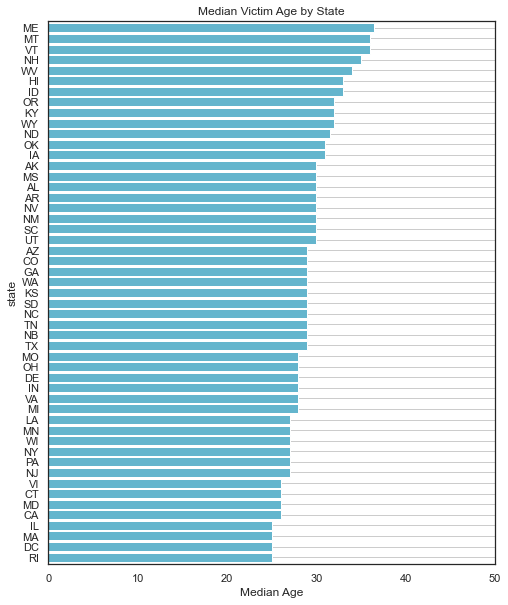

In [10]:
state_list = ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'GA', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NB', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY', 'AK', 'HI', 'VI']
filtr0 = data[data.state.isin(state_list)]

filtr0['victim_age'].fillna(0, inplace=True)
filtr0['victim_age'] = filtr0.victim_age.replace('Less than one year old' , '.5')
filtr0['victim_age'] = filtr0.victim_age.replace('99 years or older' , '99')
filtr0['victim_age'] = pd.to_numeric(data['victim_age'],errors='coerce')
age = filtr0[['state', 'victim_age']].groupby('state').median().sort_values(by='victim_age', ascending=True)


ax = age.plot(kind='barh', figsize=(8, 10), color='c', zorder=2, width=0.85, legend=None)
ax.yaxis.grid()
plt.xlim(0,50)
plt.title('Median Victim Age by State')
plt.xlabel('Median Age')


In [11]:
# def get_region(df):
#     return df.region.value_counts()
# data.groupby('year').apply(get_region)
state_list = ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'GA', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NB', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY', 'AK', 'HI', 'VI']
filtr1 = data[data.state.isin(state_list)]
mult_vic = filtr1.pivot_table(index=['year'], columns= ['region'], values="multiple_victim_count", aggfunc='sum', margins = True, margins_name='Total')
mult_vic.columns
column_order = ['Total','Midwest', 'Northeast', 'Northwest', 'Southeast', 'Southwest']
table = mult_vic.reindex(column_order, axis=1)
table.drop(table.tail(1).index,inplace=True)
table

# g = sns.PairGrid(table,
#                  x_vars=table.columns, y_vars=table.index,
#                  height=5, aspect=.25)

# g.map(sns.stripplot, size=10, orient="h", jitter=False,
#       palette="mako", linewidth=1, edgecolor="w")

# titles = list(table.columns)

# for ax, title in zip(g.axes.flat, titles):

#     # Set a different title for each axes
#     ax.set(title=title)

#     # Make the grid horizontal instead of vertical
#     ax.xaxis.grid(False)
#     ax.yaxis.grid(True)

# sns.despine(left=True, bottom=True)

region,Total,Midwest,Northeast,Northwest,Southeast,Southwest
year,,,,,,
1985,862,210,132,50,257,213
1986,858,193,122,37,317,189
1987,863,191,140,44,283,205
1988,821,160,144,38,244,235
1989,949,207,173,34,299,236
1990,990,185,198,27,296,284
1991,1120,211,230,23,333,323
1992,1341,227,300,44,418,352
1993,1364,284,277,39,373,391


In [ ]:
#florida Excluded

state_list = ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'GA', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NB', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY', 'AK', 'HI', 'VI']
filtr1 = data[data.state.isin(state_list)]

mult_vic = filtr1.pivot_table(index=['year'], columns= ['region'], values="multiple_victim_count", aggfunc='sum', margins = True, margins_name='Total')
mult_vic.columns
column_order = ['Total','Midwest', 'Northeast', 'Northwest', 'Southeast', 'Southwest']
table = mult_vic.reindex(column_order, axis=1)
table.drop(table.tail(1).index,inplace=True)
table
x = table.reset_index()
x = pd.DataFrame(x)
x_2 = x.sort_values('Total', ascending = False)

# Make the PairGrid
g = sns.PairGrid(x,
                 x_vars=x_2.columns[1:], y_vars=["year"],
                 height=10, aspect=.25)
# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="copper", linewidth=1, edgecolor="w")
# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 1500), xlabel="Incidents w/ Multiple Victims", ylabel="")
# Use semantically meaningful titles for the columns
titles = ["Total Incidents", "Midwest", "Northeast",
          "Northwest", "Southeast", "Southwest"]
for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [12]:
filtr1.pivot_table(index=['region', 'state'], values="multiple_victim_count", aggfunc='sum')
#filtr.pivot_table(index='year', columns='offenders_relationship_to_victim', values="incident_id", aggfunc='count')
# filtr1[filtr1.region == 'Midwest'].pivot_table(index=['region', 'state'], values="multiple_victim_count", aggfunc='sum')


multiple_victim_count
region    state                       
Midwest   IA                       132
          IL                      1266
          IN                       961
          KS                       226
          KY                       520
          MI                      1848
          MN                       232
          MO                      1096
          NB                       115
          ND                        31
          OH                      1246
          SD                        36
          WI                       378
Northeast CT                       298
          DC                        93
          DE                        76
          MA                       244
          MD                       948
          ME                        92
          NH                        50
          NJ                       562
          NY                      1801
          PA                      1468
          RI                        68
          VT                        55
Northwest AK                       144
          ID                       127
          MT                        91
          OR                       267
          WA                       674
          WY                        54
Southeast AL                       167
          AR                       533
          GA                      1172
          LA                      1392
          MS                       362
          NC                      1651
          OK                       651
          SC                       969
          TN                       907
          TX                      3996
          VA                      1264
          VI                        28
          WV                       256
Southwest AZ                      1141
          CA                      6321
          CO                       505
          HI                        70
          NM                       340
          NV                       418
          UT                       182

Text(0.5, 66.5, 'Month')

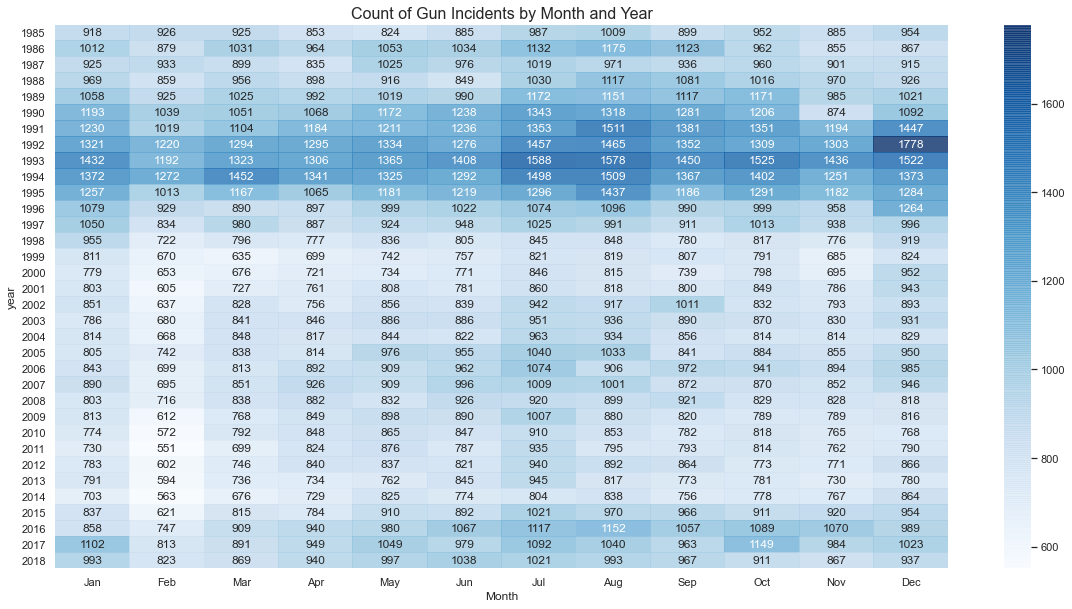

In [13]:
# What is the trend of gun violence across time? (Eda)
# Does gun violence coincide with specific events/holidays (Christmas/New Years/etc)
# Do certain seasons have a higher prevalence of gun violence?
#Florida included
plt.figure(figsize = (20,10))
pt = data.pivot_table(index="year",columns="month",values="incident_id", aggfunc="count").fillna(0)
pt.columns = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.heatmap(pt, annot=True, cmap = 'Blues', alpha = .8, fmt='d')
plt.title("Count of Gun Incidents by Month and Year", fontsize =16)
plt.xlabel('Month')

Text(0.5, 66.5, 'Month')

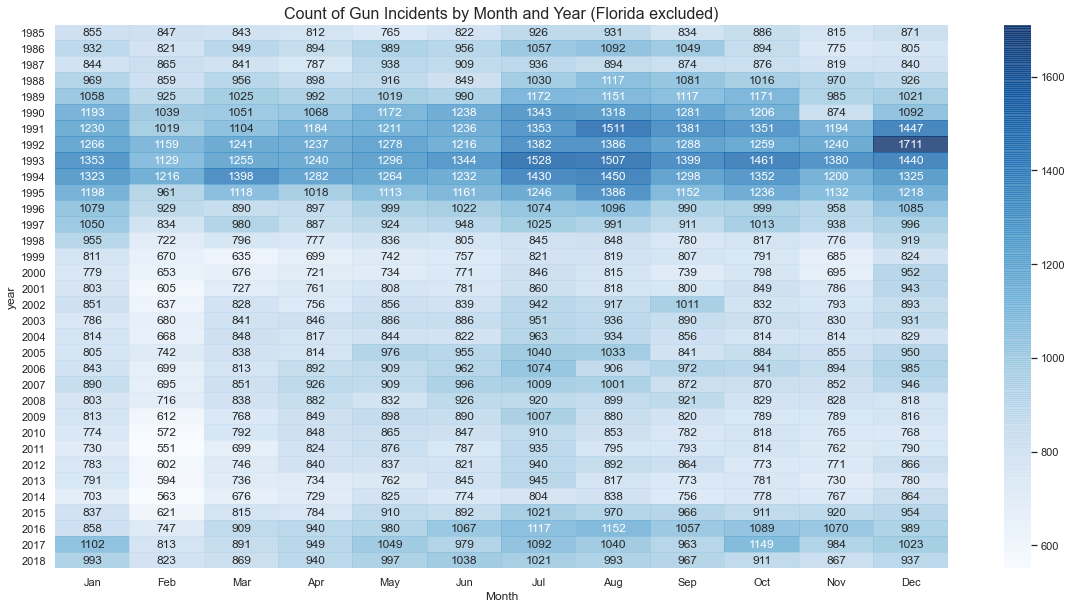

In [14]:
#Florida excluded
state_list = ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'GA', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NB', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY', 'AK', 'HI', 'VI']
filtr1 = data[data.state.isin(state_list)]
plt.figure(figsize = (20,10))
pt = filtr1.pivot_table(index="year",columns="month",values="incident_id", aggfunc="count").fillna(0)
pt.columns = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.heatmap(pt, annot=True, cmap = 'Blues', alpha = .8, fmt='d')
plt.title("Count of Gun Incidents by Month and Year (Florida excluded)", fontsize =16)
plt.xlabel('Month')

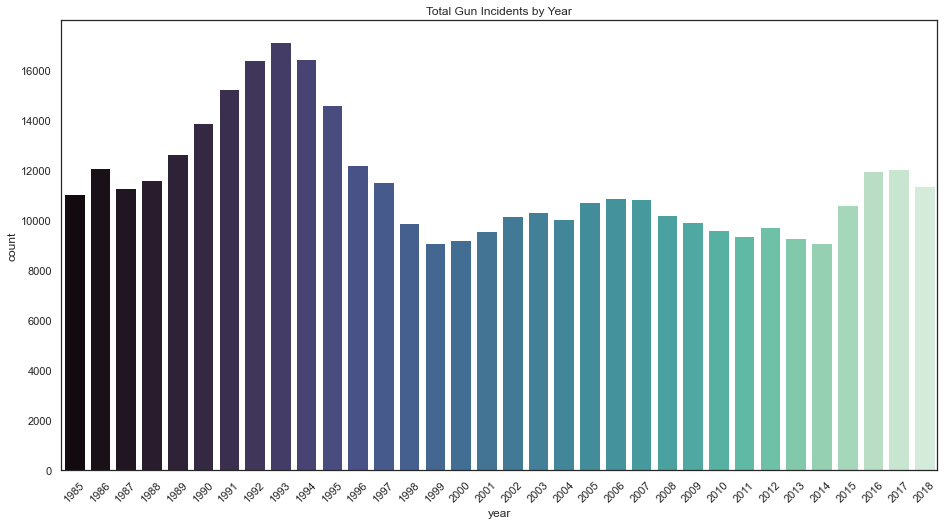

In [15]:
dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
incdnt_cnt = data['incident_id'].count()
sns.countplot(data = data, x = "year", palette = "mako")
plt.title("Total Gun Incidents by Year")
plt.xticks(rotation=45)
plt.show()

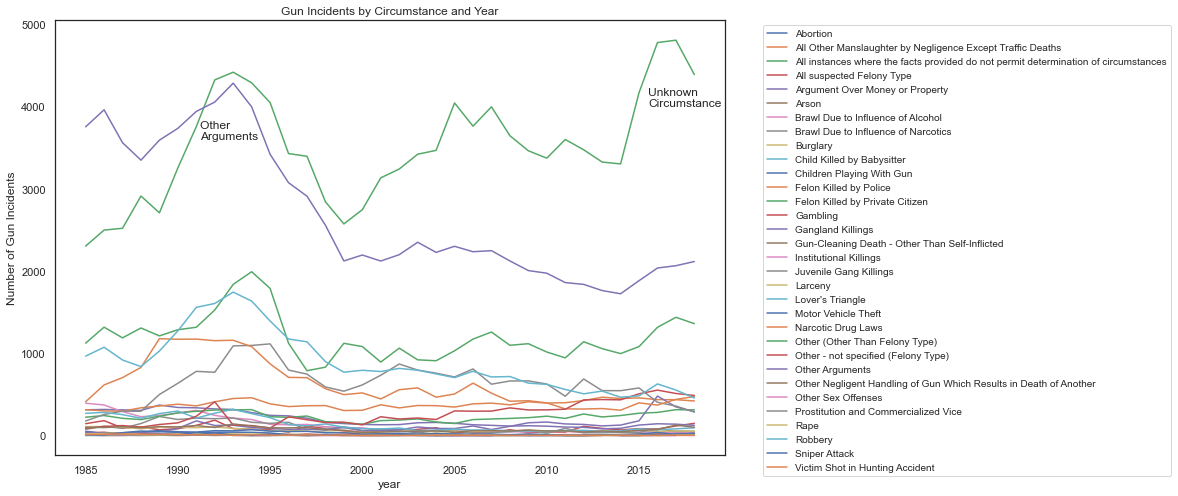

In [16]:
#Florida included
sns.set()
sns.set_style("white")

data.pivot_table(index='year', columns='circumstance', values="incident_id", aggfunc='count').plot(figsize=(12, 8))
plt.annotate(text='Other \nArguments', xy=(1991.2, 3600), xycoords='data')
plt.annotate(text='Unknown \nCircumstance', xy=(2015.5, 4000), xycoords='data')
plt.ylabel('Number of Gun Incidents')
plt.title("Gun Incidents by Circumstance and Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

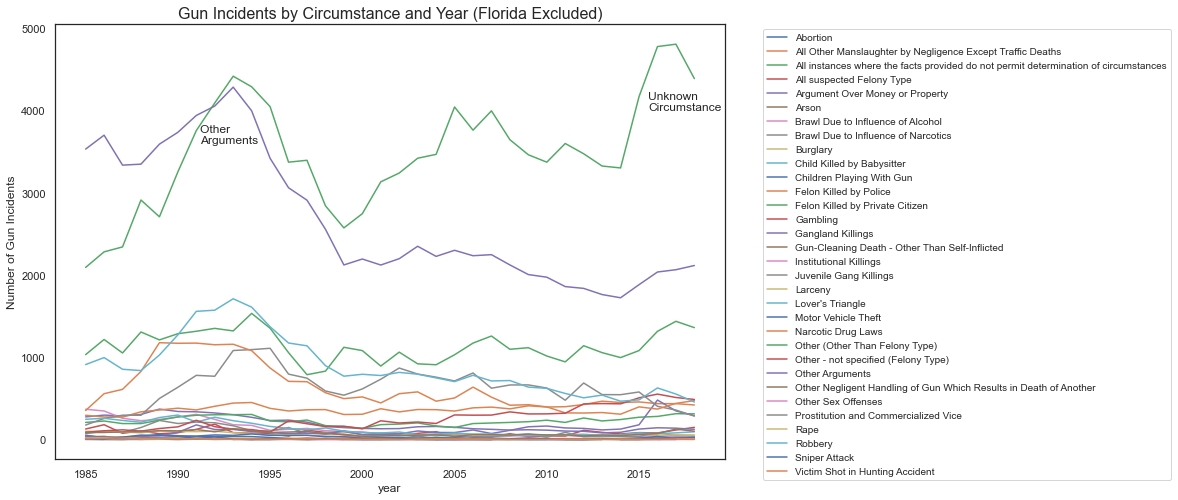

In [17]:
#Florida excluded
sns.set()
sns.set_style("white")
state_list = ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'GA', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NB', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY', 'AK', 'HI', 'VI']
filtr1 = data[data.state.isin(state_list)]
filtr1.pivot_table(index='year', columns='circumstance', values="incident_id", aggfunc='count').plot(figsize=(12, 8))
plt.annotate(text='Other \nArguments', xy=(1991.2, 3600), xycoords='data')
plt.annotate(text='Unknown \nCircumstance', xy=(2015.5, 4000), xycoords='data')
plt.ylabel('Number of Gun Incidents')
plt.title("Gun Incidents by Circumstance and Year (Florida Excluded)", fontsize =16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

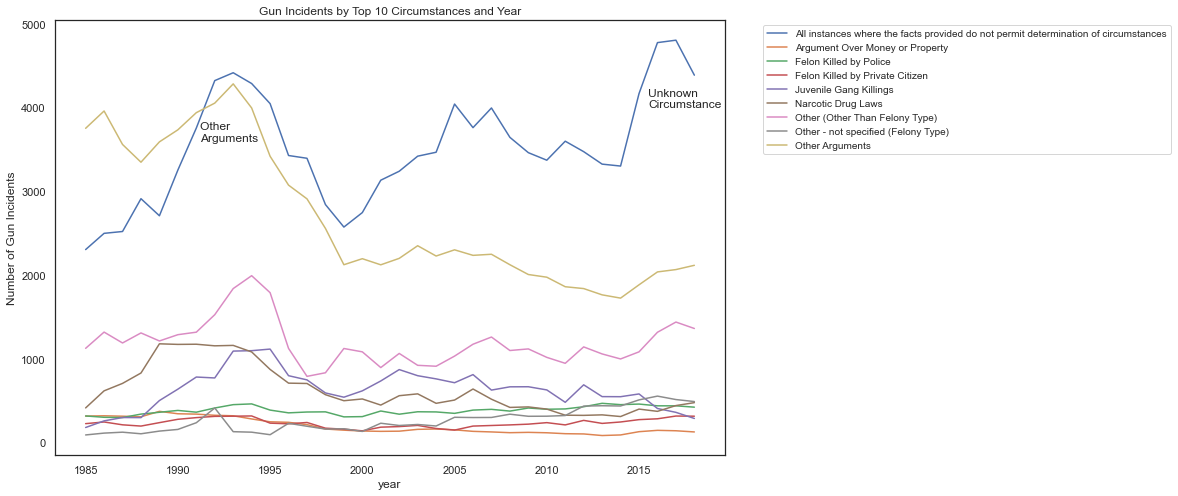

In [18]:
#Florida included
sns.set()
sns.set_style("white")
crcstnc_list = ['All instances where the facts provided do not permit determination of circumstances','Other Arguments', 'Other (Other Than Felony Type)', ' Robbery', 'Juvenile Gang Killings', 'Narcotic Drug Laws', 'Felon Killed by Police', 'Other - not specified (Felony Type)','Felon Killed by Private Citizen', 'Argument Over Money or Property']
filtr = data[data.circumstance.isin(crcstnc_list)]
filtr.pivot_table(index='year', columns='circumstance', values="incident_id", aggfunc='count').plot(figsize=(12, 8))
plt.annotate(text='Other \nArguments', xy=(1991.2, 3600), xycoords='data')
plt.annotate(text='Unknown \nCircumstance', xy=(2015.5, 4000), xycoords='data')
plt.ylabel('Number of Gun Incidents')
plt.title("Gun Incidents by Top 10 Circumstances and Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

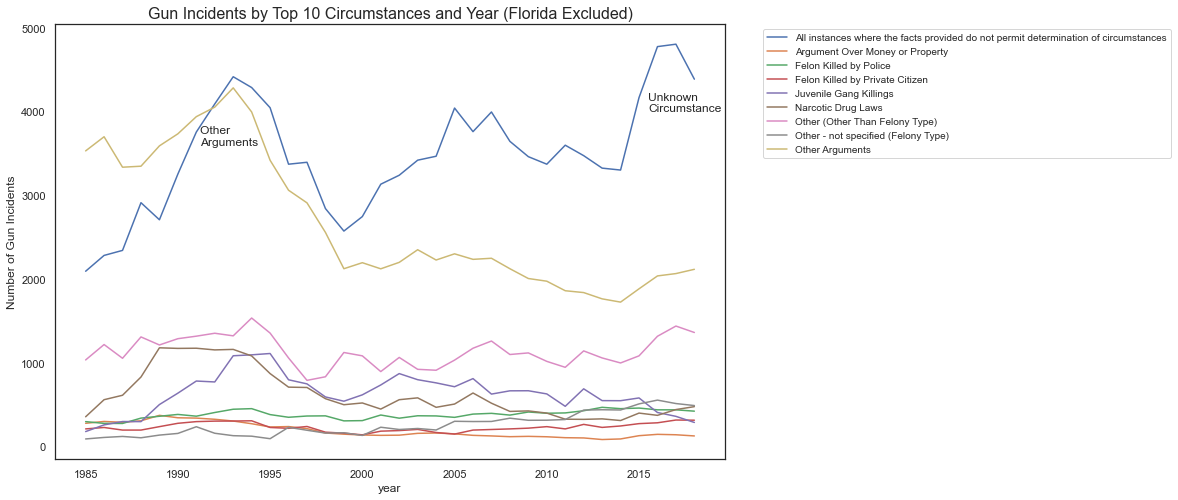

In [19]:
#Florida excluded
sns.set()
sns.set_style("white")
state_list = ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'GA', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NB', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY', 'AK', 'HI', 'VI']
crcstnc_list = ['All instances where the facts provided do not permit determination of circumstances','Other Arguments', 'Other (Other Than Felony Type)', ' Robbery', 'Juvenile Gang Killings', 'Narcotic Drug Laws', 'Felon Killed by Police', 'Other - not specified (Felony Type)','Felon Killed by Private Citizen', 'Argument Over Money or Property']
filtr = data[data.circumstance.isin(crcstnc_list) & data.state.isin(state_list)]
filtr.pivot_table(index='year', columns='circumstance', values="incident_id", aggfunc='count').plot(figsize=(12, 8))
plt.annotate(text='Other \nArguments', xy=(1991.2, 3600), xycoords='data')
plt.annotate(text='Unknown \nCircumstance', xy=(2015.5, 4000), xycoords='data')
plt.ylabel('Number of Gun Incidents')
plt.title("Gun Incidents by Top 10 Circumstances and Year (Florida Excluded)", fontsize =16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

Overall, there was more crime in the 1990s, which seems to have coincided with more gun violence. For example, in the 1990s, there were more incidents of robbery, narcotics, felony, and juvenile gang related killings. As overall crime incidents declined, more gun incidents rose which did not seem to have known circumstances. This can either be due to declines in crime or poorly documented causes of gun violence. 

#remove florida -- filter by states of interest in tiffany's analysis 

In [20]:
data['state'].unique()

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NB', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY', 'AK', 'HI', 'VI'], dtype=object)

In [21]:
data.pivot_table(index='circumstance', columns = "year", values="incident_id", aggfunc='count')

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
circumstance,,,,,,,,,,,,,,,,,,,,,
Abortion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
All Other Manslaughter by Negligence Except Traffic Deaths,8.0,19.0,11.0,3.0,9.0,11.0,10.0,19.0,17.0,11.0,...,8.0,7.0,13.0,11.0,8.0,13.0,16.0,26.0,53.0,48.0
All instances where the facts provided do not permit determination of circumstances,2304.0,2498.0,2520.0,2912.0,2708.0,3254.0,3756.0,4323.0,4417.0,4288.0,...,3462.0,3372.0,3599.0,3474.0,3325.0,3302.0,4168.0,4777.0,4806.0,4388.0
All suspected Felony Type,145.0,182.0,92.0,105.0,71.0,84.0,124.0,188.0,85.0,78.0,...,36.0,45.0,43.0,113.0,88.0,69.0,85.0,81.0,117.0,149.0
Argument Over Money or Property,314.0,318.0,313.0,306.0,371.0,342.0,338.0,324.0,318.0,280.0,...,120.0,115.0,104.0,101.0,82.0,89.0,128.0,144.0,139.0,125.0
Arson,6.0,3.0,2.0,10.0,6.0,1.0,5.0,15.0,9.0,2.0,...,4.0,7.0,3.0,1.0,1.0,NaN,NaN,3.0,8.0,13.0
Brawl Due to Influence of Alcohol,394.0,372.0,292.0,230.0,245.0,275.0,307.0,246.0,213.0,196.0,...,46.0,53.0,52.0,36.0,48.0,39.0,42.0,47.0,38.0,33.0
Brawl Due to Influence of Narcotics,77.0,114.0,88.0,147.0,233.0,196.0,212.0,205.0,214.0,162.0,...,67.0,29.0,88.0,35.0,36.0,40.0,38.0,83.0,50.0,51.0
Burglary,109.0,110.0,102.0,83.0,105.0,99.0,97.0,105.0,88.0,76.0,...,65.0,52.0,56.0,55.0,53.0,54.0,67.0,53.0,56.0,53.0


In [22]:
data.year.astype(int)
data.year

0         1985
1         1985
2         1985
3         1985
4         1985
          ... 
389725    2018
389726    2018
389727    2018
389728    2018
389729    2018
Name: year, Length: 389730, dtype: int64

In [23]:
ranges = [1985, 1990, 1995, 2000, 2005, 2010, 2015, 2018]
labels = ['late 80s', 'early 90s', 'late 90s', 'early 2000s', 'late 2000s', 'early 2010s', 'late 2010s']

data['year_range'] = pd.cut(data.year, bins = ranges, labels = labels).astype('category')
data.year_range.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: year_range, dtype: category
Categories (7, object): ['late 80s' < 'early 90s' < 'late 90s' < 'early 2000s' < 'late 2000s' < 'early 2010s' < 'late 2010s']

In [24]:
#df = pd.read_csv('stage3.csv')
df = pd.read_csv('stage3.csv', parse_dates=['date'])
df.head(100)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,489581,2013-06-07,California,Santa Monica,2036 Yorkshire Ave,6,1,http://www.gunviolencearchive.org/incident/489581,http://www.huffingtonpost.com/2013/06/07/santa...,False,...,0::55||1::25||2::68||3::26||4::68||5::50||6::23,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Female||4::Femal...,"0::Samir ""Sam"" Zawahri||1::Chris Zawahri||2::C...",NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.usatoday.com/story/news/nation/2013...,50.0,26.0
96,487645,2013-06-09,Pennsylvania,York,600 block of West Princess Street,0,4,http://www.gunviolencearchive.org/incident/487645,http://fox43.com/2013/06/11/4-injured-in-late-...,False,...,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::T...,0::Male||1::Male||2::Male||3::Female,0::Daquez Palmer||1::Joseph Ramos||2::Que’sean...,NaN,0::Injured||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim,http://www.pennlive.com/midstate/index.ssf/201...,NaN,NaN
97,487659,2013-06-10,Missouri,Saint Louis,4700 block of Highland Ave,0,6,http://www.gunviolencearchive.org/incident/487659,http://fox2now.com/2013/06/1

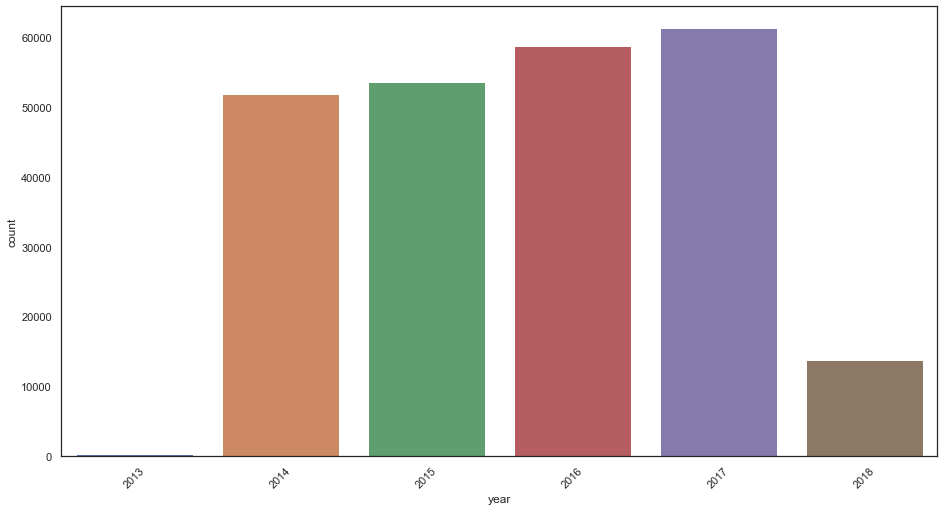

In [25]:
#how does the count of gun violence incidents compare to the media dataset?
df['year'] = df['date'].dt.year
dims = (15.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
incdnt_cnt = df['incident_id'].count()
sns.countplot(data = df, x = "year")
plt.xticks(rotation=45)
plt.show()

Media reporting data doesn't show all of 2018. Between the 2014-2018, media reported gun violence did increase, which is also consistent which the police reported data. 